# import packages

In [29]:
from fastai.tabular.all import *
import pandas as pd


import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
%matplotlib ipympl


from setup_data import setup_as_data, setup_an_data
from utils import time_period, plot_dfs, plot_all_df_colones_in_different_plots

## Get data

In [30]:
Austevoll_Sor_file_path = "C:\\Users\\yfess\\Desktop\\data\\row_data\\SmartOcean-Data-featherfiles\\Austevoll_Sor\\Austevoll_data_instrument.feather"
print(Austevoll_Sor_file_path)
Austevoll_Sor_df = pd.read_feather(Austevoll_Sor_file_path)
Austevoll_Sor_df.set_index('Time', inplace=True)
len(Austevoll_Sor_df)

C:\Users\yfess\Desktop\data\row_data\SmartOcean-Data-featherfiles\Austevoll_Sor\Austevoll_data_instrument.feather


22393

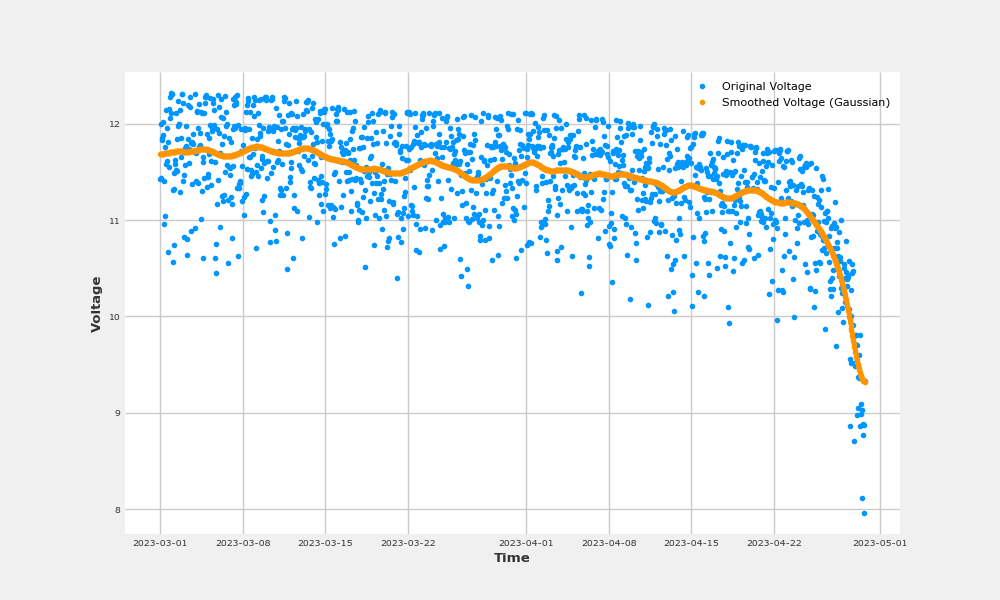

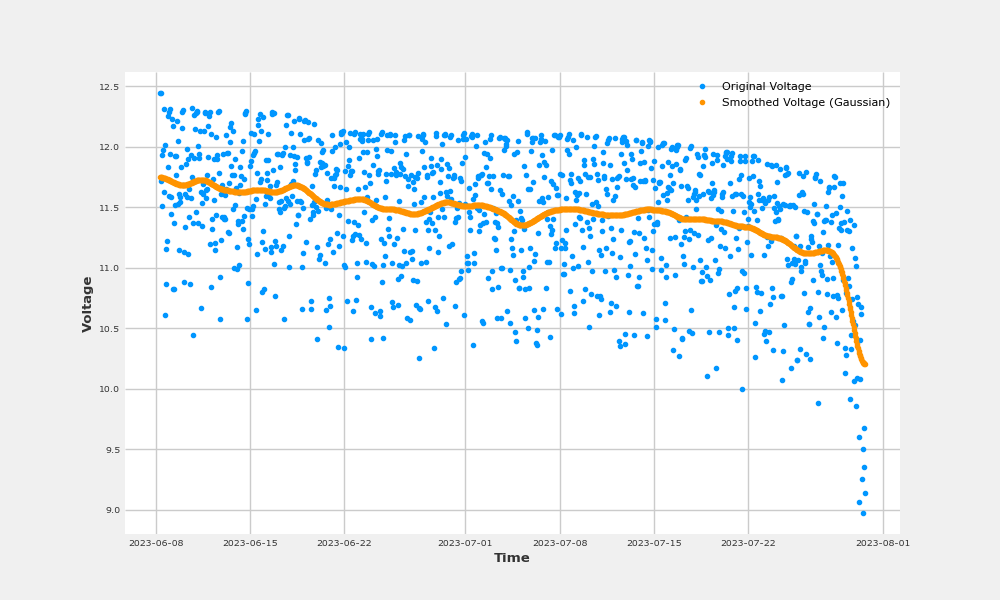

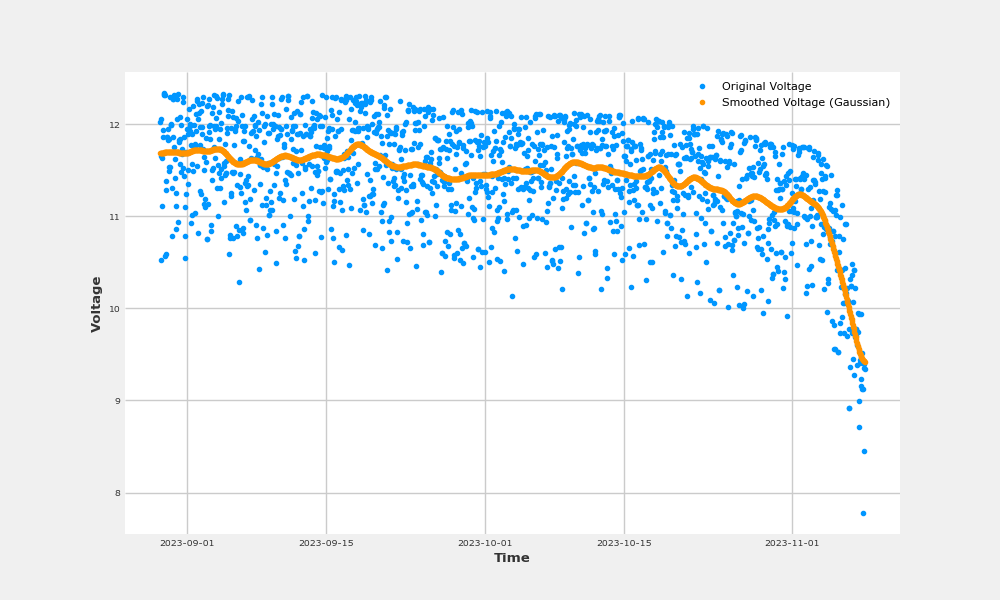

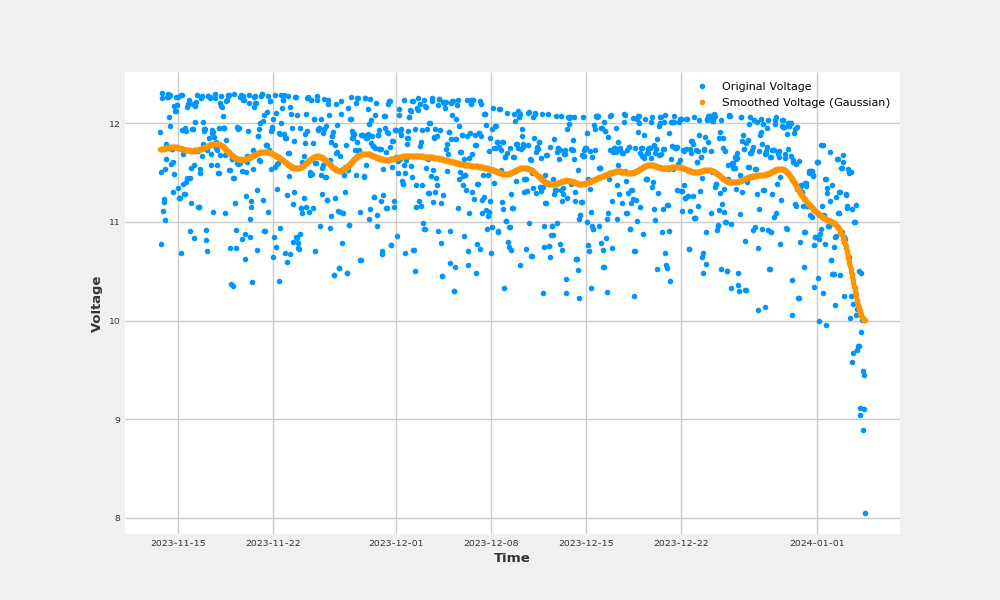

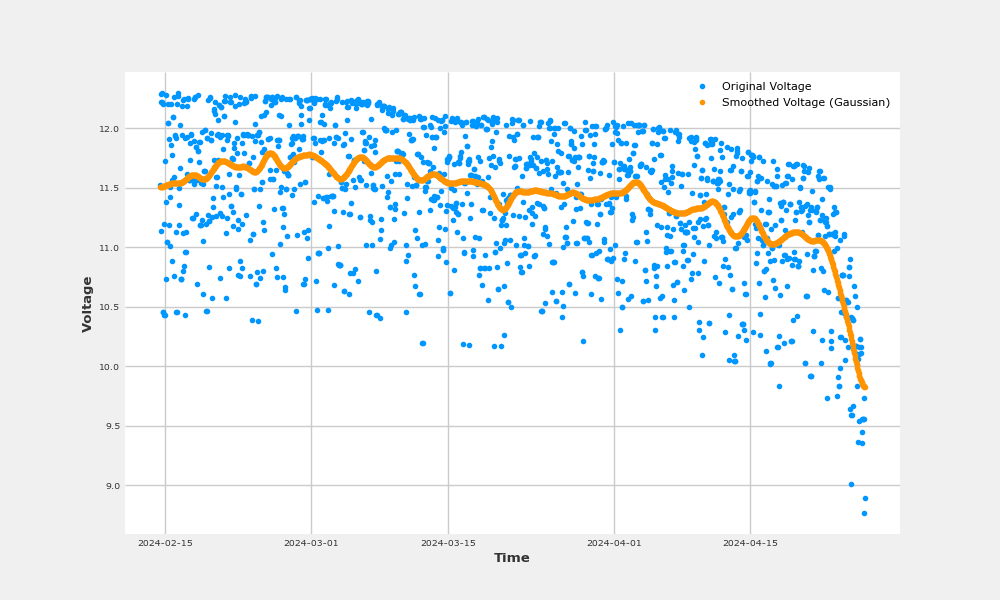

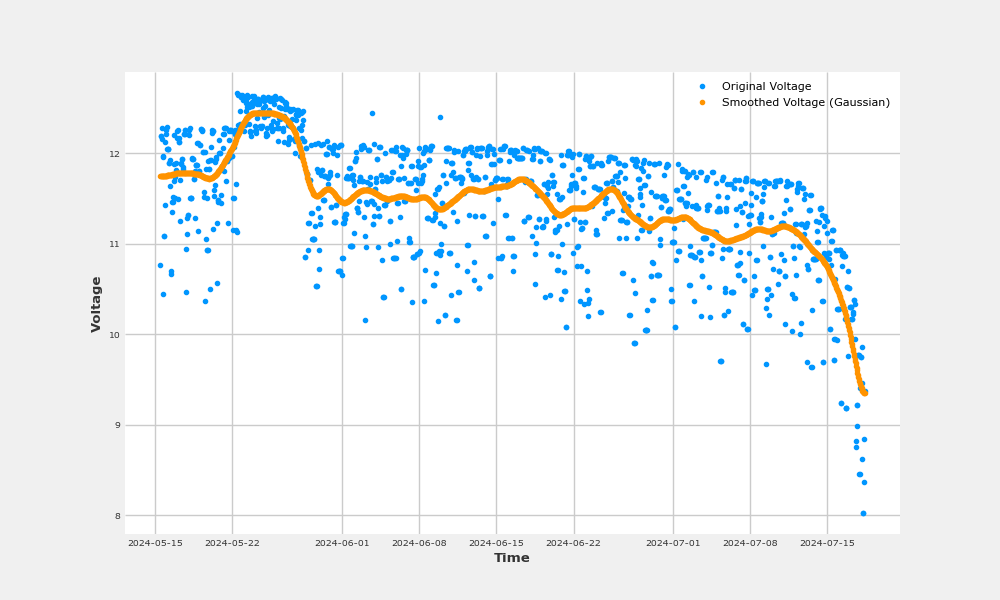

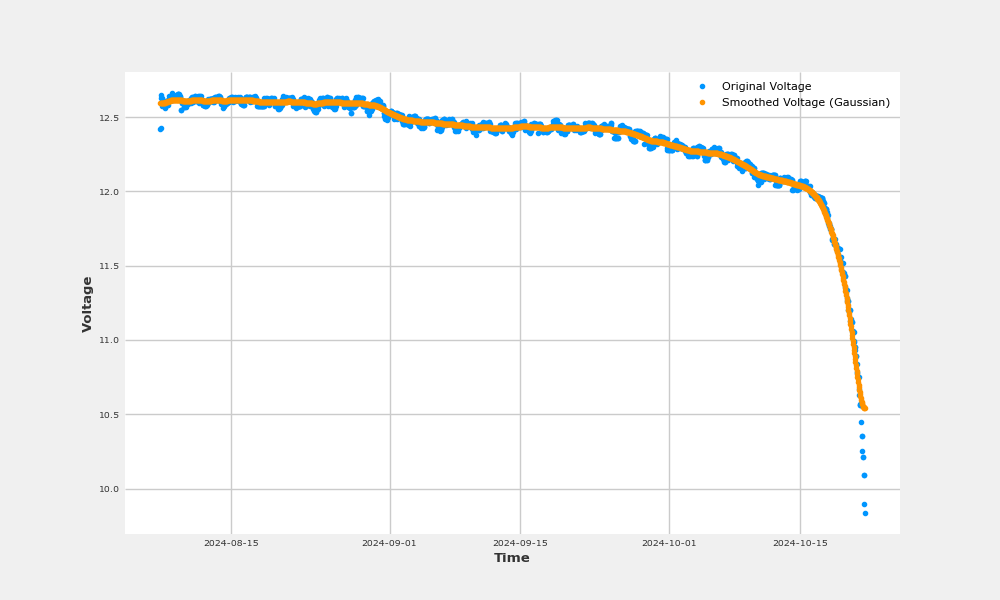

In [31]:
as_list_segments = [3, 4, 5, 6, 7, 8, 9]
Austevoll_Sor_df_segments = setup_as_data(Austevoll_Sor_df, smooth_sigma=18, list_segments=as_list_segments)

In [32]:
Austevoll_Sor_df_segments[3].columns

Index(['Num_Not_Nan', 'Num_Nan', 'Num_Bytes', 'Time_Since_t0_n', 'year',
       'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'Temperature', 'Temperature_sum', 'sin_week',
       'cos_week', 'smooth_System_Parameters.Input_Voltage',
       'System_Parameters.Input_Voltage'],
      dtype='object')

## Normalize input voltage for each segment using Scalar

In [33]:
from feature_adder import normalize_data

seg_scalers = {}

for seg_key, seg_df in Austevoll_Sor_df_segments.items():
    seg_df, scaler_y = normalize_data(seg_df, 'System_Parameters.Input_Voltage')
    
    Austevoll_Sor_df_segments[seg_key] = seg_df
    
    seg_scalers[seg_key] = scaler_y

print(seg_scalers)

{3: Scaler, 4: Scaler, 5: Scaler, 6: Scaler, 7: Scaler, 8: Scaler, 9: Scaler}


In [34]:
Austevoll_Sor_df_segments[3].columns

Index(['Num_Not_Nan', 'Num_Nan', 'Num_Bytes', 'Time_Since_t0_n', 'year',
       'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'Temperature', 'Temperature_sum', 'sin_week',
       'cos_week', 'smooth_System_Parameters.Input_Voltage',
       'System_Parameters.Input_Voltage', 'System_Parameters.Input_Voltage_n'],
      dtype='object')

## concatinate ausevold soor data

In [35]:
as_df = pd.concat(Austevoll_Sor_df_segments.values(), axis=0)

## model training

In [36]:
as_df.reset_index(inplace=True)
as_df.head(1)

,Time,Num_Not_Nan,Num_Nan,Num_Bytes,Time_Since_t0_n,year,month_0,month_1,month_2,month_3,...,weekday_4,weekday_5,weekday_6,Temperature,Temperature_sum,sin_week,cos_week,smooth_System_Parameters.Input_Voltage,System_Parameters.Input_Voltage,System_Parameters.Input_Voltage_n
0,2023-03-01,20.0,29.0,206.0,-1.73024,2023.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,4.0,4.0,NaN,NaN,11.688707,11.42525,0.794929


In [37]:
target = 'System_Parameters.Input_Voltage_n'

features =  ['Num_Not_Nan',
        'Num_Nan',
        'Num_Bytes',
        #'Time_Since_t0', 
        'Time_Since_t0_n', #****
        'year', #* 
        'month_0', 
        'month_1',
        'month_2', 
        'month_3', 
        'month_4', 
        'month_5', 
        'month_6', 
        'month_7',
        'month_8', 
        'month_9', 
        'month_10', 
        'month_11', 
        'weekday_0', 
        'weekday_1',
        'weekday_2', 
        'weekday_3', 
        'weekday_4', 
        'weekday_5', 
        'weekday_6',
        'Temperature',
        'Temperature_sum', 
        #'sin_month', 
        #'cos_month', 
        'sin_week', 
        'cos_week',
        #'sin_day', 
        #'cos_day', 
        #'sin_hour', 
        #'cos_hour',
        #'smooth_System_Parameters.Input_Voltage', 
        #'System_Parameters.Input_Voltage'
]

features =  ['Num_Not_Nan',
        'Num_Nan',
        'Time_Since_t0_n', #****
        'Temperature',
        'Temperature_sum',
        'sin_week', 
        'cos_week',
]

In [38]:
X = as_df[features].copy()
y = as_df[target].copy()
len(X), len(y)

(10724, 10724)

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# normalize X
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Output layer for regression (1 neuron, linear activation)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

ValueError: Name tf.RaggedTensorSpec has already been registered for class tensorflow.python.ops.ragged.ragged_tensor.RaggedTensorSpec.

In [ ]:
# plot loss

plt.figure()
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#plot predictions
plt.figure()
plt.plot(y_test, y_pred, 'o')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# fin